In [2]:
import os 
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import Metrics
import tensorflow_probability as tfp
import tensorflow as tf

2023-03-23 11:44:47.651881: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 11:44:48.354418: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [14]:
root = 'Results/No_ILI_input/' 
files = os.listdir(root)

In [27]:
      df  

,True,Pred,Std,Data,Model
0,1.215711,1.021560,0.63147,0.178385,0.274935
1,1.222761,1.062420,0.63147,0.191208,0.291881
2,1.233712,1.112774,0.63147,0.202094,0.302840
3,1.249800,1.055685,0.63147,0.197302,0.299737
4,1.271704,0.990037,0.63147,0.187510,0.291286
...,...,...,...,...,...
275,0.952412,0.965400,0.63147,0.133128,0.227533
276,0.946401,0.965777,0.63147,0.133949,0.225430
277,0.938759,0.940943,0.63147,0.130256,0.222763
278,0.929657,0.945258,0.63147,0.131142,0.222099


2015-16 7 0.8524812494813764
2015-16 14 0.8526164636447852
2015-16 21 0.7476479021763053
2015-16 28 0.6065851216697998
2016-17 7 0.5588592796542122
2016-17 14 0.5584153848489097
2016-17 21 0.5489860356141717
2016-17 28 0.4233455547767943
2017-18 7 0.5311239675725314
2017-18 14 0.5307003096523951
2017-18 21 0.3490422410939692
2017-18 28 0.21750342253107613
2018-19 7 0.790021568919273
2018-19 14 0.7901061890218752
2018-19 21 0.6167262223435496
2018-19 28 0.4424369529934598


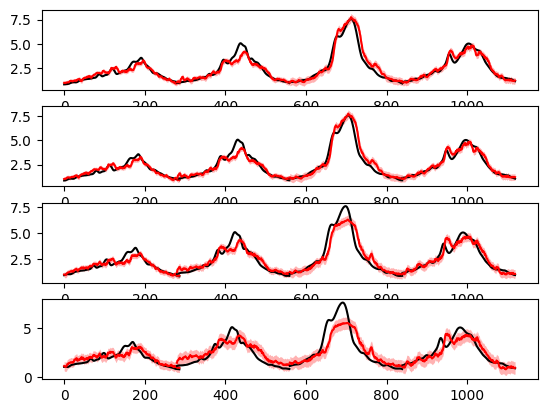

In [28]:
for i, year in enumerate(['2015-16','2016-17','2017-18','2018-19']):
    for gamma in [7,14,21,28]:
        df_orig = [pd.read_csv(root + 'US_'+str(n)+'_Forecasts_100_' + year + str(gamma) + 'days_ahead.csv', index_col=0, parse_dates=True) for n in range(10)]
        means = np.asarray(df_orig).mean(0)
        std = np.sqrt(np.mean(np.asarray(df_orig)[:, :, 2]**2))
        df = pd.DataFrame(columns = df_orig[0].columns, index=df_orig[0].index, data = means)
        df['Std'] = std
        
        
        plt.subplot(4,1,int(gamma/7))
        x = np.linspace(i*df['True'].shape[0], (i+1)*df['True'].shape[0]-1, df['True'].shape[0])
        plt.plot(x, df['True'], color='black')
        plt.plot(x, df['Pred'], color='red')
        plt.fill_between(x, df['Pred']+df['Std'], df['Pred']-df['Std'], alpha=0.3, color='red', linewidth=0)
        print(year, gamma, Metrics.skill(df))

In [ ]:
US_Forecasts_2015-1614days_ahead
S_Forecasts_100_2015-1614days_ahead

In [5]:
def nll(true, mean=None, std=None):
    try:
        if isinstance(true, pd.DataFrame):
            mean = true['Pred']
            std = true['Std']
            true = true['True']
        p_y = tfp.distributions.Normal(mean, std)
        return (-p_y.log_prob(true)).numpy().mean()
    except Exception as e:
        print(e)
        return 100



0.8448415681592257

In [ ]:
def mae(true, pred=None, bins=False):
    if isinstance(true, pd.DataFrame):
        if bins:
            idx = np.argmin(np.abs(true.cumsum(1) - 0.5).values, 1)
            true.columns[idx].astype(float)
            pred = true.columns[idx].astype(float) + 0.05
            true = true['True'].values
            pred = pred.values

        else:
            pred = true['Pred']
            true = true['True']
    return true, pred
    return tf.reduce_mean(tf.math.abs(true - pred)).numpy()

In [ ]:
true,pred = mae(df)

In [ ]:
np.mean(np.abs(true - pred))

In [ ]:
tf.math.abs(true - pred)